# Machine Learning Basics

## Functions in Python

Functions are a very useful construct in Python and are simply defined by the keyword `def`. The `return` keyword specifies what the function returns.

In [2]:
# function with positional (mandatory) argument
def square(a):
    return a*a
print("square(2)=", square(2))


# function with keyword (optional) arguments
def power(x, n=2):
    return x**n
print("power(2)=", power(2))  # uses default argument
print("power(2)=", power(x=2))  # specifies positional argument with its keyword
print("power(2, 3)=", power(2, 3))  # explicitly passes both arguments
print("power(2, n = 3)=", power(2, n=3)) # explicitly passes the argument with keyword name
print("power(2, n = 3)=", power(x=2, n=3)) # explicitly passes both argument with keyword name


# lambda function (inline function)
lambda_square = lambda x, y: x**2 + y**2  
# lambda <variable_name1>, <variable_name2>: <some expression using the variables that should be computed and returned>
print("lambda_square(2)=", lambda_square(2, 3))


# function with type hinting
def add(a: int, b: int, c: int = 3) -> int:
    return a + b + c
print("add(1, 2, 3)=", add(1, 2))

# type hint lambda function
from typing import Callable
lambda_power: Callable[[float, int], float] = lambda x, y: x**y


# variable number of positional arguments
def return_args(var, *args):
    return var, args  # args will be a tuple

var1, rest1 = return_args(1, 2, 3)
print(f"{var1=}, {rest1=}")
var2, rest2 = return_args(2, "this returns", 4, "arguments")
print(f"{var2=}, {rest2=}")

### keyword arguments
def return_kwargs(var, opt_var=5.0, **kwargs):
    return var, opt_var, kwargs  #kwargs will be a dictionary

var1, opt_var1, rest1 = return_kwargs(1, c=3)
print(f"{var1=}, {opt_var1=}, {rest1=}")
var2, opt_var2, rest2 = return_kwargs(1, c=4, d="arguments")
print(f"{var2=}, {opt_var2=}, {rest2=}")

# `return` keyword exits the function, any code after `return` is reached will not run.
def odd_or_even(val):
    if val % 2 == 0:
        return "even"
    else:
        return "odd"

def odd_or_even_shorter(val):
    if val % 2 == 0:
        return "even"  # return exits the function
    return "odd"

# You can force arguments to be position-only
def f(a, b, /, c):
    print(a, b, c)

f(1, 2, 3)  # works
f(1, 2, c=3)  # works
# f(a=1, b=2, c=3)  # Error

# You can force arguments to be keyword-only
def g(a, *, b, c):
    print(a, b, c)

g(1, b=2, c=3)  # works
# g(1, 2, 3)  # Error:

square(2)= 4
power(2)= 4
power(2)= 4
power(2, 3)= 8
power(2, n = 3)= 8
power(2, n = 3)= 8
lambda_square(2)= 13
add(1, 2, 3)= 6
var1=1, rest1=(2, 3)
var2=2, rest2=('this returns', 4, 'arguments')
var1=1, opt_var1=5.0, rest1={'c': 3}
var2=1, opt_var2=5.0, rest2={'c': 4, 'd': 'arguments'}
1 2 3
1 2 3
1 2 3


### Exercise 5.1

Write a function `estimate_effective_mass` that takes:  

- Three **positional arguments**:  
  - `band_gap` (float, in eV)  
  - `electron_mass` (float, in units of free electron mass)  
  - `hole_mass` (float, in units of free electron mass)  

- One **keyword argument**:  
  - `method` (string, `"average"` or `"reduced"`) — determines how to combine the masses  (defaults to `""average"`)

Inside the function:  
- If `method == "average"`, return the arithmetic mean of `electron_mass` and `hole_mass`.  
- If `method == "reduced"`, return the reduced mass:  

\[
m^* = \frac{m_e \cdot m_h}{m_e + m_h}
\]

- If `band_gap < 0.1 eV`, print a warning `"Material may be metallic!"` before returning.  

**Example usage:**  
```python
print(estimate_effective_mass(1.1, 0.98, 0.81, method="average"))
print(estimate_effective_mass(0.3, 1.2, 0.9, method="reduced"))
```

In [3]:
# Your code here:


## Gradient Descent Demonstration

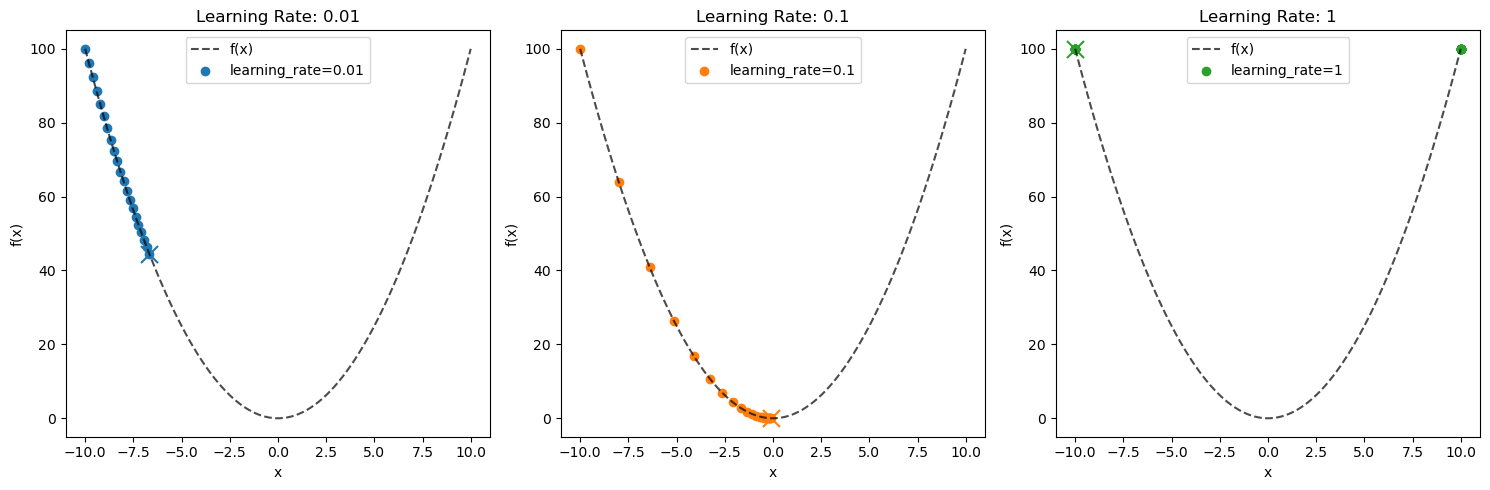

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# function to minimize
def f(x):
    return x**2

# derivative of the function
def d_f(x):
    return 2*x

# gradient descent algorithm
def gradient_descent(x0, learning_rate, steps):
    x = x0
    x_values = [x0]
    for i in range(steps):
        x -= learning_rate * d_f(x)
        x_values.append(x)
    return x_values

# initialize parameters

# initial value
x0 = -10
steps = 20
learning_rates = [0.01, 0.1, 1]
# learning rates to plot

# initialize the figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# colors for the plots
colors = ['C0', 'C1', 'C2']

# plot the gradient descent for different learning rates
for i, learning_rate in enumerate(learning_rates):

    # compute gradient descent
    x_values = gradient_descent(x0, learning_rate, steps)

    # function values at gradient descent steps
    y_values = [f(x_val) for x_val in x_values]

    # plot the original function
    x = np.linspace(-10, 10, 100)
    y = f(x)
    axs[i].plot(x, y, 'k--', label='f(x)', alpha=0.7)

    # plot the gradient descent
    axs[i].scatter(x_values, y_values, label=f'learning_rate={learning_rate}', c=colors[i])

    # plot the final value of function after gradient descent steps
    axs[i].scatter(x_values[-1], f(x_values[-1]), c=colors[i], s=150, marker='x')

    axs[i].legend()
    # axs[i].grid(True, which="both", ls="-", alpha=0.3)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('f(x)')
    axs[i].set_title(f'Learning Rate: {learning_rate}')
    plt.tight_layout()

plt.show()

## Overfitting and Underfitting Demonstration

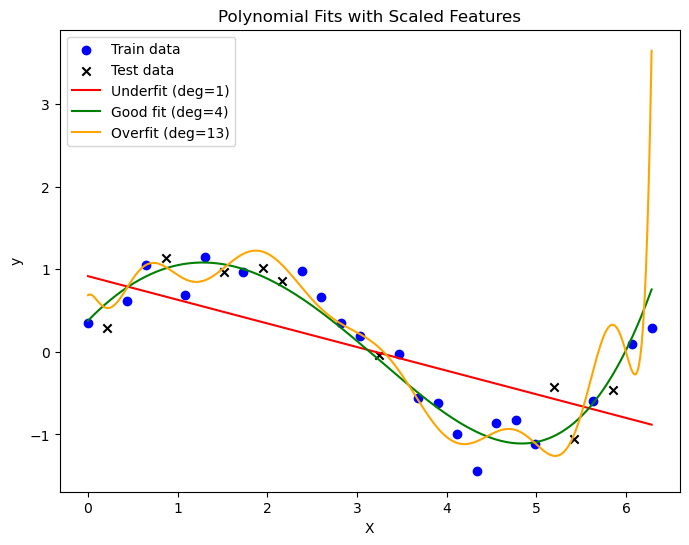

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 2 * np.pi, 30)
y = np.sin(X) + 0.2 * np.random.randn(len(X))  # Targeted true function: sin(x) but we add noise

# Train/test split (70% train, 30% test)
indices = np.arange(len(X))
np.random.shuffle(indices)
split = int(0.7 * len(X))
train_idx, test_idx = indices[:split], indices[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# Scaling the input features (after scaling -> mean ≈ 0, variance ≈ 1): Improves numeric robustness
def scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_full_scaled = scale(X)  # for visualization

# Polynomial fitting functions
def fit_polynomial(X, y, degree):
    X_poly = np.vander(X, degree + 1, increasing=True)
    coeffs = np.linalg.pinv(X_poly.T @ X_poly) @ X_poly.T @ y
    return coeffs

def predict_polynomial(X, coeffs):
    X_poly = np.vander(X, len(coeffs), increasing=True)
    return X_poly @ coeffs

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Plotting Fits
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color="blue", label="Train data")
plt.scatter(X_test, y_test, color="black", marker="x", label="Test data")

X_grid = np.linspace(X.min(), X.max(), 400)
X_grid_scaled = scale(X_grid)

for deg, col, lab in zip([1, 4, 13], ["red", "green", "orange"], 
                         ["Underfit (deg=1)", "Good fit (deg=4)", "Overfit (deg=13)"]):
    coeffs = fit_polynomial(X_train_scaled, y_train, deg)
    y_grid = predict_polynomial(X_grid_scaled, coeffs)
    plt.plot(X_grid, y_grid, color=col, label=lab)

plt.legend()
plt.title("Polynomial Fits with Scaled Features")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

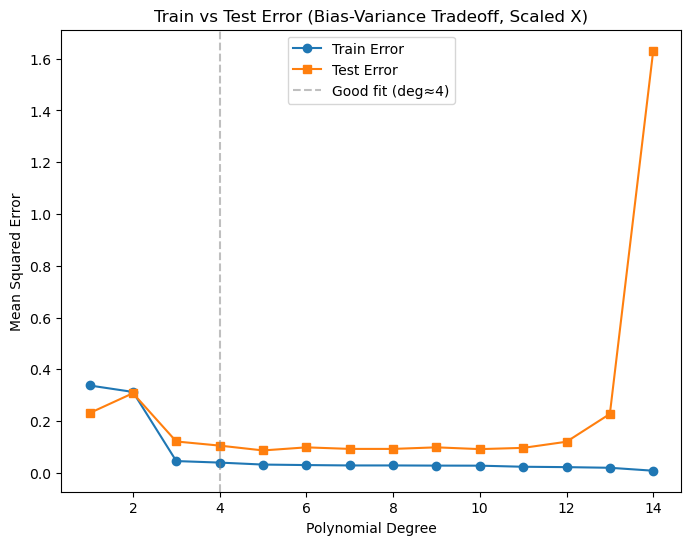

In [6]:
max_degree = 14
train_errors, test_errors = [], []

for deg in range(1, max_degree + 1):
    coeffs = fit_polynomial(X_train_scaled, y_train, deg)
    
    y_pred_train = predict_polynomial(X_train_scaled, coeffs)
    y_pred_test = predict_polynomial(X_test_scaled, coeffs)
    
    train_errors.append(mse(y_train, y_pred_train))
    test_errors.append(mse(y_test, y_pred_test))

plt.figure(figsize=(8, 6))
plt.plot(range(1, max_degree + 1), train_errors, marker="o", label="Train Error")
plt.plot(range(1, max_degree + 1), test_errors, marker="s", label="Test Error")
plt.axvline(4, color="gray", linestyle="--", alpha=0.5, label="Good fit (deg≈4)")

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test Error (Bias-Variance Tradeoff, Scaled X)")
plt.legend()
plt.show()